## Outline

* Recap of data
* Feedforward network with Pytorch tensors and autograd
* Using Pytorch's NN -> Functional, Linear, Sequential & Pytorch's Optim
* Moving things to CUDA

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

import torch

In [2]:
torch.manual_seed(0)

In [5]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

## Generate Dataset

In [6]:
# We have already seen this datasetes in TrainingFFN we can refer those to understand these
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


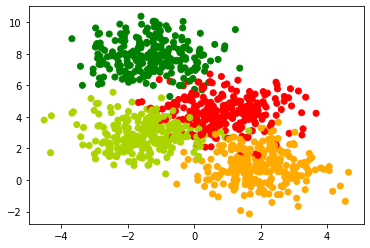

In [7]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


## Using torch tensors and autograd

We are using the SecondNetowrk.png to make the neural network

In [9]:
# Converting all the train and test data into torch tensors
X_train, Y_train, X_val, Y_val = map(torch.tensor, (X_train, Y_train, X_val, Y_val))

In [10]:
print(X_train.shape, Y_train.shape)

torch.Size([750, 2]) torch.Size([750])


We would like to compute the 4 values y1 y2 y3 y4, which correspond to the interperted praobability of a particular input belonging to the four classes.  

x could be a single data [1,2] item meaing one data item with 2 features or [750,2] which could be the entire batch of the data that we have for training.

We are using a different notation this time - Vector Notation in SecondNetwork.png. We are calling the entire first layer part 1 as a1 and the part 2 as h1. Similarly the second layer first all pre-activations are a2 and activations are h2.

h2 will be equilent to the y outputs because we directly the outputs as the activation outputs to the last layer.


In [11]:
# Forward propagation - modeling the network
# Matrix conventions for dimnetions is we take (input, output)
def model(x):
  a1 = torch.matmul(x, weights1) + bias1 # (N, 2) x (2, 2) -> (N, 2)
  
  # pytorch sigmoid fucntion - will apply sigmoid point wise to all the elements of a1
  h1 = a1.sigmoid() # (N, 2)
  
  a2 = torch.matmul(h1, weights2) + bias2 # (N, 2) x (2, 4) -> (N, 4)
  
  '''  
  Softamx activation function - typical pyTorch notation uses chaining
  a2.exp() is pyTorch notation of exponential function - it will eallpy exponent fx'n to each element of the vector and retain it's size
  The we are dividing it by the sum that we have 
  we are taking a2.exp() and doing submission using sum and -1 in the argument tells us, along which axis we would like to sum. 
  In case of -1 we take the last dimention
  then at the end we unsqueeze - convets a tensor of size of N to change it's dimentions and make it (N,1). 
  The -1 in the argument means in the last add a one'''
  h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1) # (N, 4)
  return h2

In [18]:
# Just for example
a = torch.rand(2,4)
print(a)
print()
print(a.exp().sum(0))
print()
print(a.exp().sum(-1), 'The shape is ', a.exp().sum(-1).shape)
print()
print(a.exp().sum(-1).unsqueeze(-1), 'The shape is ', a.exp().sum(-1).unsqueeze(-1).shape)
print()
print(a.exp()/a.exp().sum(-1).unsqueeze(-1), 'The shape is ', (a.exp()/a.exp().sum(-1).unsqueeze(-1)).shape) # this row adds up to 1

tensor([[0.5263, 0.2437, 0.5846, 0.0332],
        [0.1387, 0.2422, 0.8155, 0.7932]])

tensor([2.8414, 2.5500, 4.0545, 3.2441])

tensor([5.7965, 6.8935]) The shape is  torch.Size([2])

tensor([[5.7965],
        [6.8935]]) The shape is  torch.Size([2, 1])

tensor([[0.2920, 0.2201, 0.3095, 0.1783],
        [0.1666, 0.1848, 0.3279, 0.3206]]) The shape is  torch.Size([2, 4])
